# 決定木(分類)
<iframe width="560" height="315" src="https://www.youtube.com/embed/qQa9Emh0pZE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install dtreeviz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# サンプルデータを作成
２クラス分類をするためのサンプルデータを作成します。

In [4]:
n_classes = 2
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=2,
    n_classes=n_classes,
    n_clusters_per_class=1,
)

# 決定木を作成
`DecisionTreeClassifier(criterion="gini").fit(X, y)`でモデルを訓練し、作成した木の決定境界を可視化します。
`criterion="gini"`は分岐を決めるための指標を指定するオプションです。


```{hint}
[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
```

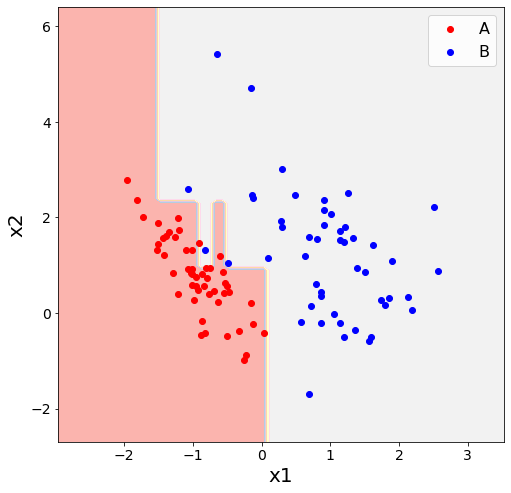

In [5]:
# モデルの訓練
clf = DecisionTreeClassifier(criterion="gini").fit(X, y)

# 決定境界のカラーマップ用データ
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 決定境界を可視化
plt.figure(figsize=(8, 8))
plt.tight_layout()
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.xlabel("x1")
plt.ylabel("x2")

# ラベルごとに色を分けてプロット
for i, color, label_name in zip(range(n_classes), ["r", "b"], ["A", "B"]):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=label_name, cmap=plt.cm.Pastel1)

plt.legend()
plt.show()

# 決定木の構造を画像で出

```{hint}
[sklearn.tree.plot_tree — scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
```

<Figure size 432x288 with 0 Axes>

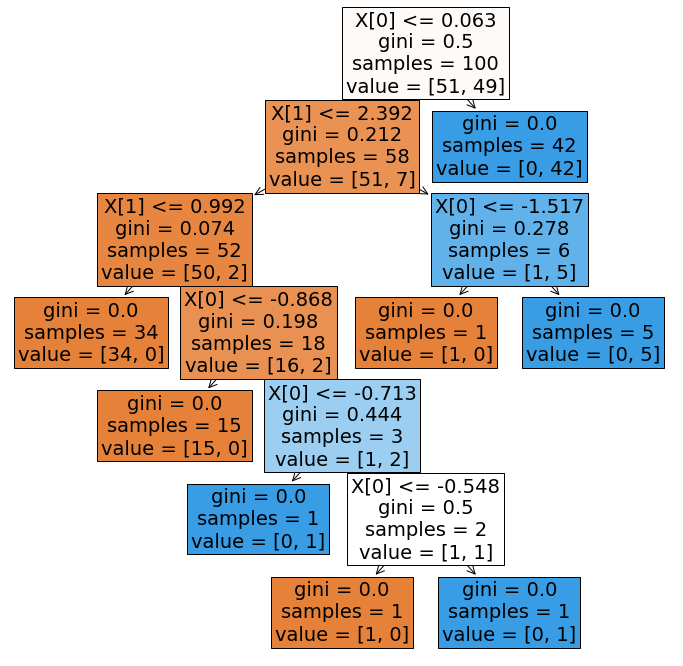

In [6]:
plt.figure()
clf = DecisionTreeClassifier(criterion="gini").fit(X, y)
plt.figure(figsize=(12, 12))
plot_tree(clf, filled=True)
plt.show()